## Point Data

Here we are going to plot some markers on top of the maps we already made. We will use seismicity information since this is so readily available online (we use GeoJSON files from the [USGS site](http://earthquake.usgs.gov/earthquakes/search/) since these are easy to parse. Typically you have a limit on how many data to grab in each pass so if you want a global dataset you end up with fewer small events or a limited date range. I did this for a few places for you.


In [12]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import numpy
import gplately

In [27]:
# ETOPO1

gdownload = gplately.DataServer("Muller2019")
age_grid = gdownload.get_age_grid(0)
global_extent = [-180,180,-90,90]

Checking whether the requested files need to be updated...
Requested files are up-to-date!


In [28]:
# Recent earthquake data (from static downloaded files)

with np.load('../../Data/Reference/earthquakes_global_2000_2014.npz') as npz:
    eqlon = npz['lon']
    eqlat = npz['lat']
    eqdep = npz['depth']
    eqmag = npz['mag']

print ("Global depth range:     ", eqdep.min()," - ", eqdep.max())
print ("Global magnitude range: ", eqmag.min()," - ", eqmag.max())


Global depth range:      0.0  -  691.6
Global magnitude range:  5.5  -  9.1


### Plotting points

We add the points to the map using the usual plotting tools from matplotlib plus the transformation argument

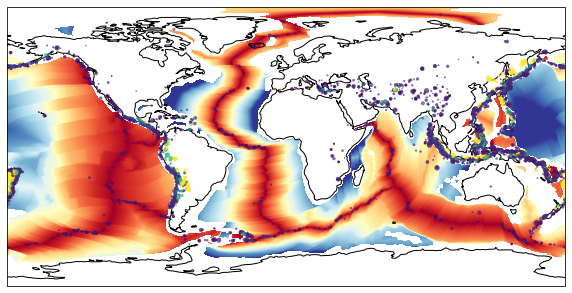

In [29]:

projection = ccrs.PlateCarree()
global_extent = [-180,180,-90,90]
norm_eqdep = matplotlib.colors.Normalize(vmin = 0.0, vmax = 200, clip = False)

fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")

ax = plt.axes(projection=projection)
ax.set_extent(global_extent)

age_grid.imshow(vmin=0, vmax=150, cmap='RdYlBu')

ax.coastlines()

ax.scatter(eqlon, eqlat, c=eqdep, cmap='viridis', norm=norm_eqdep, linewidth=0.33, 
           s=(eqmag-5.5)*10, transform=ccrs.PlateCarree(), alpha=0.7, zorder=2)

fig.savefig("GlobalAgeMapEq.png", dpi=600, bbox_inches='tight', )

Try focussing on a particular region, like Oceania.